# Visualizing Earnings Based On College Majors

In this project we'll use the dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repository](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries and more. Here are some of the columns in the dataset:

- `Rank` - rank by median earnings (the dataset is ordered by this column)
- `Major_code` - major code
- `Major` - major description
- `Major_category` - category of major
- `Total` - total number of people with major
- `Sample_size` - sample size (unweighted) of full-time year-round ONLY (used for earnings)
- `Men` - male graduates
- `Women` - female graduates
- `ShareWomen` - women as share of total
- `Employed` - number employed
- `Unemployment_rate` - Unemployed / (Unemployed + Employed)
- `Median` - median salary of full-time, year-round workers
- `Low_wage_jobs` - number in low-wage service jobs
- `Full_time` - number employed 35 hours or more
- `Part_time` - number employed less than 35 hours

To explore the data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

recent_grads = pd.read_csv('recent-grads.csv')

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [6]:
recent_grads.shape

(173, 21)

In [7]:
recent_grads.isnull().mean()

Rank                    0.00000
Major_code              0.00000
Major                   0.00000
Total                   0.00578
Men                     0.00578
Women                   0.00578
Major_category          0.00000
ShareWomen              0.00578
Sample_size             0.00000
Employed                0.00000
Full_time               0.00000
Part_time               0.00000
Full_time_year_round    0.00000
Unemployed              0.00000
Unemployment_rate       0.00000
Median                  0.00000
P25th                   0.00000
P75th                   0.00000
College_jobs            0.00000
Non_college_jobs        0.00000
Low_wage_jobs           0.00000
dtype: float64

The percentage of missing values is quite low (0.58%) and same for the 4 columns containing missing values. To take a look at missing values:

In [8]:
recent_grads[recent_grads.isnull().any(axis=1)]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


Only one row contains missing values and to drop it:

In [9]:
recent_grads = recent_grads.dropna()

In [10]:
recent_grads.shape

(172, 21)

### Scatter Plots

To generate scatter plots and explore relationships between columns:

<AxesSubplot:title={'center':'Sample_size vs. Median'}, xlabel='Sample_size', ylabel='Median'>

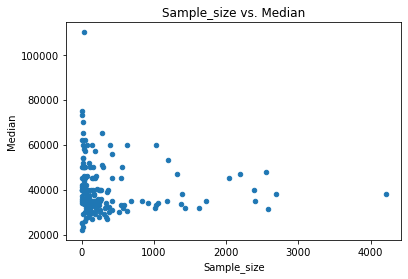

In [11]:
recent_grads.plot(x='Sample_size', y='Median',
                  kind='scatter', title='Sample_size vs. Median')

<AxesSubplot:title={'center':'Sample_size vs. Unemployment_rate'}, xlabel='Sample_size', ylabel='Unemployment_rate'>

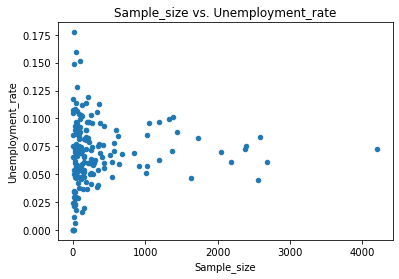

In [12]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate',
                  kind='scatter', title='Sample_size vs. Unemployment_rate')

The scatter plots do not show that students in more popular majors make more money (there is no strong positive or negative correlation in `Sample_size` vs. `Median` plot or in `Sample_size` vs. `Unemployment_rate` plot).

<AxesSubplot:title={'center':'ShareWomen vs. Unemployment_rate'}, xlabel='ShareWomen', ylabel='Unemployment_rate'>

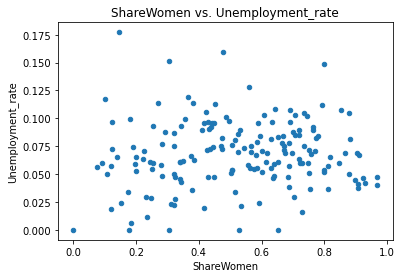

In [13]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate',
                  kind='scatter', title='ShareWomen vs. Unemployment_rate')

<AxesSubplot:title={'center':'ShareWomen vs. Median'}, xlabel='ShareWomen', ylabel='Median'>

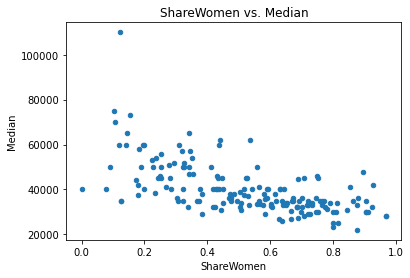

In [14]:
recent_grads.plot(x='ShareWomen', y='Median',
                  kind='scatter', title='ShareWomen vs. Median')

Students that majored in subjects that were majority female also do not make more money. Although there is no correlation in `ShareWomen` vs. `Unemployment_rate`, the `ShareWomen` vs. `Median` plot shows obvious negative correlation, or in other words, majority female majors graduates make less money.

<AxesSubplot:title={'center':'Men vs. Median'}, xlabel='Men', ylabel='Median'>

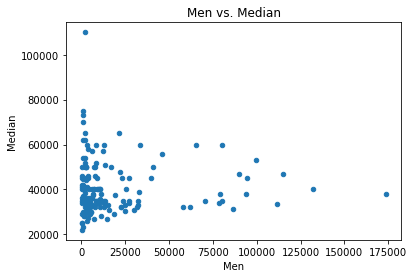

In [15]:
recent_grads.plot(x='Men', y='Median',
                  kind='scatter', title='Men vs. Median')

<AxesSubplot:title={'center':'Women vs. Median'}, xlabel='Women', ylabel='Median'>

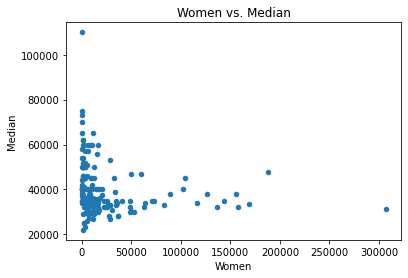

In [16]:
recent_grads.plot(x='Women', y='Median',
                  kind='scatter', title='Women vs. Median')

It seems that scatter plot `Men` vs. `Median` shows no obvious correlation, but `Women` vs. `Median` could be looked into further for a possible weak negative correlation (especially in context of `ShareWomen` vs. `Median` negative correlation).

<AxesSubplot:title={'center':'Full_time vs. Median'}, xlabel='Full_time', ylabel='Median'>

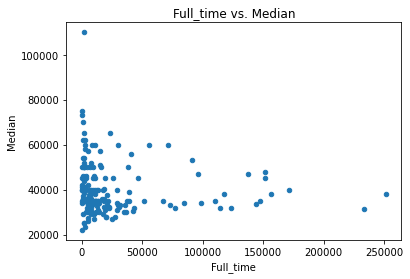

In [17]:
recent_grads.plot(x='Full_time', y='Median',
                  kind='scatter', title='Full_time vs. Median')

Regarding the number of full-time employees and median salary, it seems the there is no obvious correlation.

### Histograms

To explore the distributions:

<AxesSubplot:>

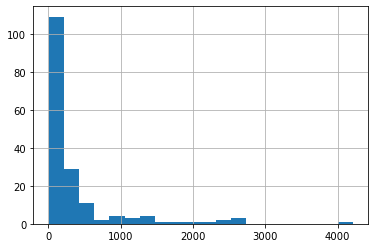

In [18]:
recent_grads['Sample_size'].hist(bins=20)

Sample size histogram shows that the smaller sample sizes (up to approx. 200) are most frequent.

<AxesSubplot:>

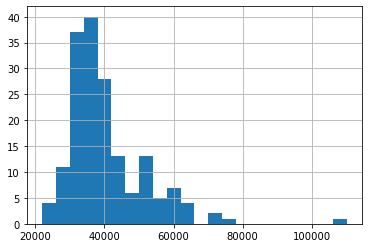

In [19]:
recent_grads['Median'].hist(bins=22)

Median column histogram shows that the most common median salary range is approximately 30,000 - 40,000.

<AxesSubplot:>

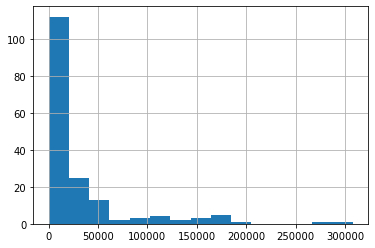

In [20]:
recent_grads['Employed'].hist(bins=15)

Most majors have up to 20,000 employed graduates. But there are also some with more than 250,000 employed graduates:

In [21]:
recent_grads[recent_grads['Employed']>250000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.473190,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207


<AxesSubplot:>

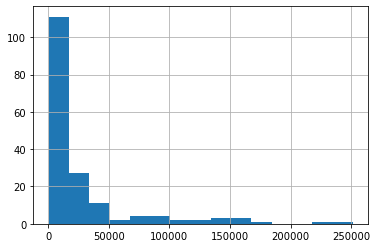

In [22]:
recent_grads['Full_time'].hist(bins=15)

Most majors have up to approx. 16,700 graduates that work full-time. To take a look at the majors with highest numbers of full time graduates:

<AxesSubplot:>

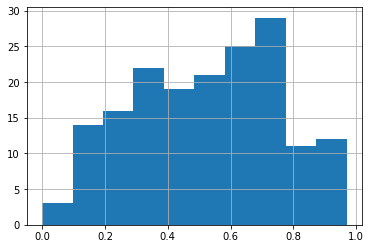

In [23]:
recent_grads['ShareWomen'].hist(bins=10)

The question we're interested in is what percent of majors are predominantly male and predominantly female. Looking at the histogram showing share of women graduates, the peak of distribution is after 0.5. It could be possible that there is more than 50% of majors that are predominantly female.

We can also take a look at the share of men in majors:

<AxesSubplot:>

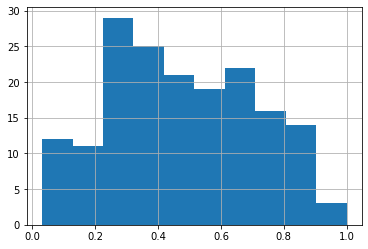

In [24]:
(1-recent_grads['ShareWomen']).hist(bins=10) # percentage of men in majors

The histogram showing share of men has the peak of distribution before 0.5. It could be possible that there is less than 50% of majors that are predominantly male.

We can also check our assumption, and calculate the percentage of predominantly male and predominantly female majors:

In [25]:
# percentage of predominantly male majors
recent_grads[recent_grads['ShareWomen']<0.5]['ShareWomen'].count()/recent_grads['ShareWomen'].count()*100

44.18604651162791

In [26]:
# percentage of predominantly female majors
recent_grads[recent_grads['ShareWomen']>0.5]['ShareWomen'].count()/recent_grads['ShareWomen'].count()*100

55.81395348837209

<AxesSubplot:>

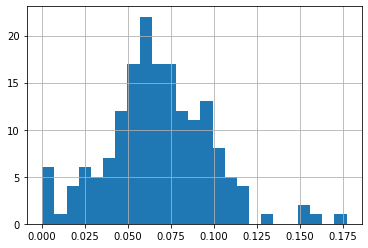

In [27]:
recent_grads['Unemployment_rate'].hist(bins=25)

Most common unemployment rate is from 5 to 7.5%.

<AxesSubplot:>

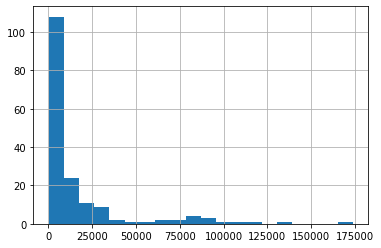

In [28]:
recent_grads['Men'].hist(bins=20)

<AxesSubplot:>

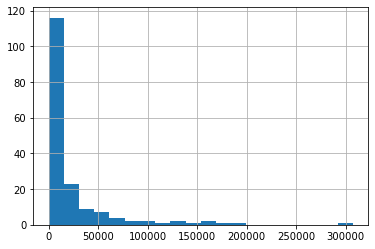

In [29]:
recent_grads['Women'].hist(bins=20)

Majors with up to around 9,000 men or 15,000 women graduates are the most common. But there are also majors with close to 175,000 men graduates and around 300,000 women graduates:

In [30]:
recent_grads[recent_grads['Men']>170000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
76,77,6203,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,Business,0.47319,4212,276234,...,50357,199897,21502,0.072218,38000,29000,50000,36720,148395,32395


In [31]:
recent_grads[recent_grads['Women']>300000]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207


### Scatter Matrix Plot

A scatter matrix plot combines both scatter plots and histograms into one grid of plots:

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>]], dtype=object)

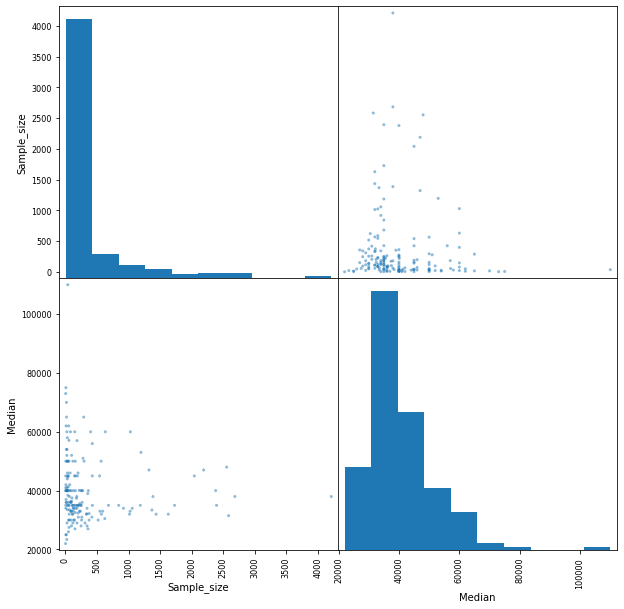

In [32]:
from pandas.plotting import scatter_matrix 
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

Looking at the `Sample_size`/`Median` scatter matrix, again we see that popularity of the major doesn't infer a higher salary. There are small sample sizes in very high median salaries and large sample sizes in lower median salaries. 

array([[<AxesSubplot:xlabel='Sample_size', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Median', ylabel='Sample_size'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Sample_size'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Median'>,
        <AxesSubplot:xlabel='Median', ylabel='Median'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Median'>],
       [<AxesSubplot:xlabel='Sample_size', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>,
        <AxesSubplot:xlabel='Unemployment_rate', ylabel='Unemployment_rate'>]],
      dtype=object)

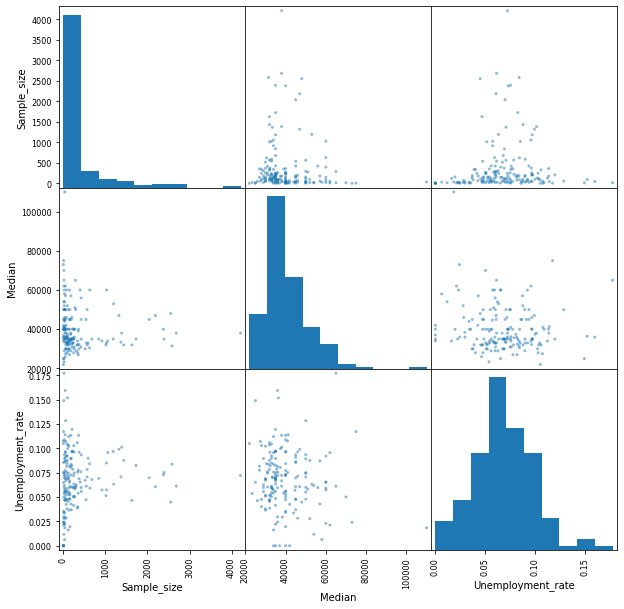

In [33]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

The `Sample_size`/`Median`/`Unemployment_rate` scatter matrix demonstrates again that there's no direct link between popularity of the major, the salary and unemployment. We can also observe the different histogram distributions.

### Bar Plots

To compare the percentages of women (`ShareWomen`) from the first ten rows and last ten rows of the `recent_grads` dataframe:

<AxesSubplot:xlabel='Major'>

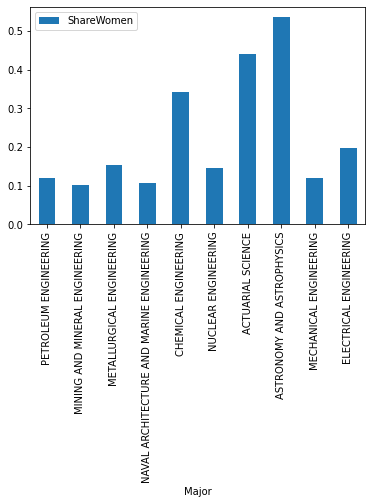

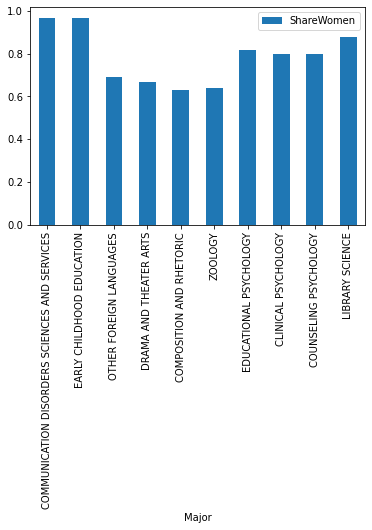

In [34]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

In the first 10 rows of the `recent_grads` dataframe are mostly Engineering majors with women in minority, except Astronomy and Astrophysics where the percentage of women is over 50%.

In the last 10 rows of the `recent_grads` dataframe we find various majors (Psychology, Education, Languages etc.) with women in majority.

To compare the unemployment rate (`Unemployment_rate`) from the first ten rows and last ten rows of the `recent_grads` dataframe:

<AxesSubplot:xlabel='Major'>

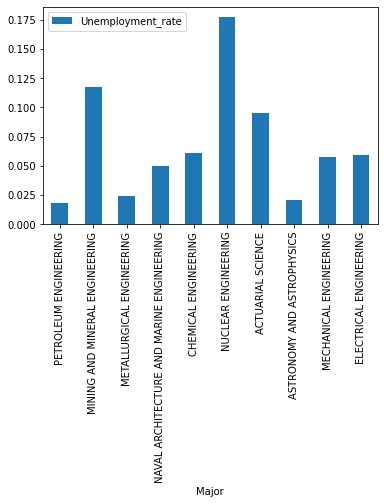

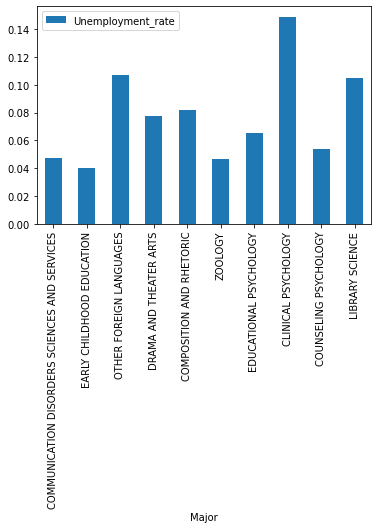

In [35]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

In the first 10 rows of the `recent_grads` dataframe unemployment rate is very low (< 2.5%) in Petroleum Engineering, Astronomy and Astrophysics and Metallurgical Engineering. High unemployment rate is in Nuclear Engineering and Mining and Mineral Engineering (> 10%).

In the last 10 rows of the `recent_grads` dataframe unemployment rate is low in Early Childhood Education, Zoology and Communication Disorders Sciences and Services (< 5%). High unemployment rate is in Clinical Psychology, Library Science and Foriegn Languages (> 10%).

### Grouped Bar Plot

To compare the number of men with the number of women in each category of majors we can use a grouped bar plot.

In [36]:
wmc = recent_grads.groupby('Major_category')['Women'].sum()
wmc

Major_category
Agriculture & Natural Resources         35263.0
Arts                                   222740.0
Biology & Life Science                 268943.0
Business                               634524.0
Communications & Journalism            260680.0
Computers & Mathematics                 90283.0
Education                              455603.0
Engineering                            129276.0
Health                                 387713.0
Humanities & Liberal Arts              440622.0
Industrial Arts & Consumer Services    126011.0
Interdisciplinary                        9479.0
Law & Public Policy                     87978.0
Physical Sciences                       90089.0
Psychology & Social Work               382892.0
Social Science                         273132.0
Name: Women, dtype: float64

In [37]:
mmc = recent_grads.groupby('Major_category')['Men'].sum()
mmc

Major_category
Agriculture & Natural Resources         40357.0
Arts                                   134390.0
Biology & Life Science                 184919.0
Business                               667852.0
Communications & Journalism            131921.0
Computers & Mathematics                208725.0
Education                              103526.0
Engineering                            408307.0
Health                                  75517.0
Humanities & Liberal Arts              272846.0
Industrial Arts & Consumer Services    103781.0
Interdisciplinary                        2817.0
Law & Public Policy                     91129.0
Physical Sciences                       95390.0
Psychology & Social Work                98115.0
Social Science                         256834.0
Name: Men, dtype: float64

In [38]:
wmmcat = pd.DataFrame()
wmmcat['Women'] = wmc
wmmcat['Men'] = mmc
wmmcat = wmmcat.rename_axis(index=None)
wmmcat

,Women,Men
Agriculture & Natural Resources,35263.0,40357.0
Arts,222740.0,134390.0
Biology & Life Science,268943.0,184919.0
Business,634524.0,667852.0
Communications & Journalism,260680.0,131921.0
Computers & Mathematics,90283.0,208725.0
Education,455603.0,103526.0
Engineering,129276.0,408307.0
Health,387713.0,75517.0
Humanities & Liberal Arts,440622.0,272846.0


<AxesSubplot:>

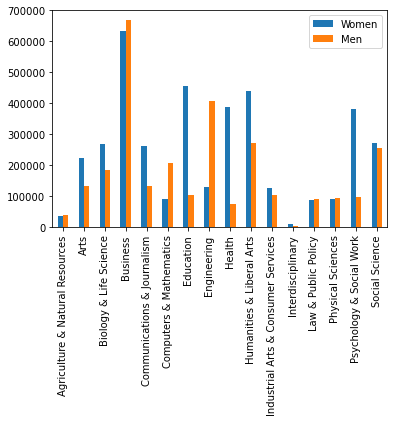

In [39]:
wmmcat.plot(kind='bar')

There are majors with relatively balanced number of men and women (Business, Law & Public Policy, Physical Sciences, Agriculture & Natural Resources, Social Science, Industrial Art & Consumer Services). And there are majors with obvious differences in number of men and women: Arts, Biology & Life Sciences, Communications & Journalism and Humanities & Liberal Arts (more women than men), and Computers and Mathematics (more men than women). Big gaps in number of men and women are in Engineering (more men than women) and Education, Health, and Psychology & Social Science (more women than men).

### Box Plots

To explore the distributions of median salaries and unemployment rate we can use box plots:

{'whiskers': [<matplotlib.lines.Line2D at 0x199f0375c40>,
 'caps': [<matplotlib.lines.Line2D at 0x199f03852e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x199f0375970>],
 'medians': [<matplotlib.lines.Line2D at 0x199f03857c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x199f0385a90>],
 'means': []}

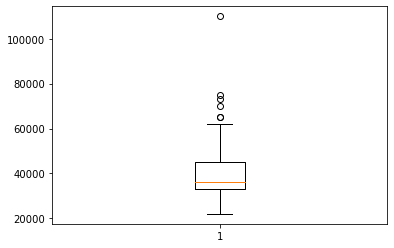

In [40]:
plt.boxplot(recent_grads['Median'])

The median of the median salaries indicates that there is more graduates with lower median salaries. There are a few very high outliers. 

{'whiskers': [<matplotlib.lines.Line2D at 0x199f03e3280>,
 'caps': [<matplotlib.lines.Line2D at 0x199f03e3820>,
 'boxes': [<matplotlib.lines.Line2D at 0x199f03d2f70>],
 'medians': [<matplotlib.lines.Line2D at 0x199f03e3dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x199f03f10d0>],
 'means': []}

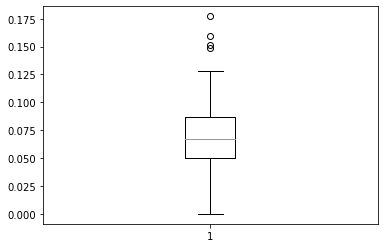

In [41]:
plt.boxplot(recent_grads['Unemployment_rate'])

Box plot for unemployment rate is relatively balanced, with the median around 7% and with a few outliers around 15% and more.

### Hexagonal Bin Plots

To visualize the columns that had dense scatter plots from earlier in the project we can use hexagonal bin plots: 

Text(0.5, 1.0, 'Sample_size vs. Median')

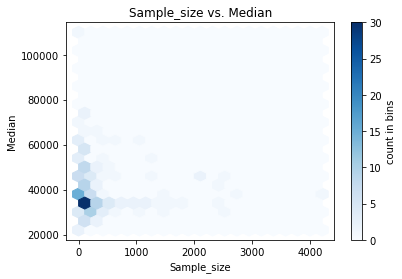

In [42]:
plt.hexbin(recent_grads['Sample_size'], recent_grads['Median'], gridsize=20, cmap='Blues')
plt.colorbar(label='count in bins')
plt.xlabel('Sample_size')
plt.ylabel('Median')
plt.title('Sample_size vs. Median')

Text(0.5, 1.0, 'Sample_size vs. Unemployment_rate')

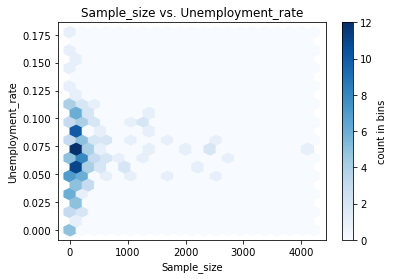

In [43]:
plt.hexbin(recent_grads['Sample_size'], recent_grads['Unemployment_rate'], gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count in bins')
plt.xlabel('Sample_size')
plt.ylabel('Unemployment_rate')
plt.title('Sample_size vs. Unemployment_rate')

Text(0.5, 1.0, 'Men vs. Median')

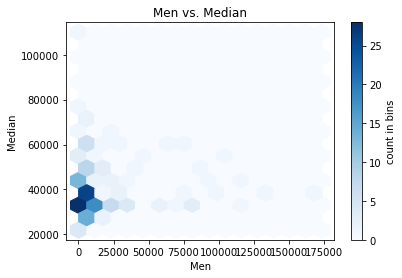

In [44]:
plt.hexbin(recent_grads['Men'], recent_grads['Median'], gridsize=15, cmap='Blues')
plt.colorbar(label='count in bins')
plt.xlabel('Men')
plt.ylabel('Median')
plt.title('Men vs. Median')

Text(0.5, 1.0, 'Women vs. Median')

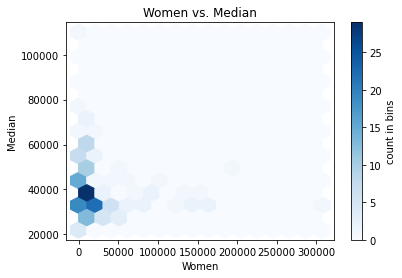

In [45]:
plt.hexbin(recent_grads['Women'], recent_grads['Median'], gridsize=15, cmap='Blues')
plt.colorbar(label='count in bins')
plt.xlabel('Women')
plt.ylabel('Median')
plt.title('Women vs. Median')

Text(0.5, 1.0, 'Full_time vs. Median')

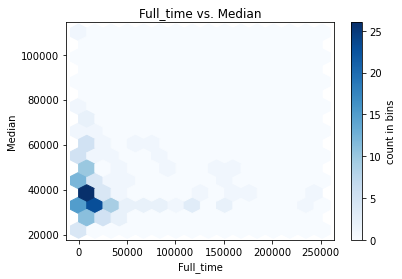

In [46]:
plt.hexbin(recent_grads['Full_time'], recent_grads['Median'], gridsize=15, cmap='Blues')
plt.colorbar(label='count in bins')
plt.xlabel('Full_time')
plt.ylabel('Median')
plt.title('Full_time vs. Median')

It's easy to observe the bins with most data points and hexagonal bin plots reinforce the conclusions from the scatter plots.